In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np

def convertRgbToGrayLevel(im1):
    m=im1.shape[0]
    n=im1.shape[1]
    im2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im2[i,j]=getDistance(im1[i,j,:])
    return im2


def getDistance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d = ((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    
    return d

def getJpegFiles():
    os.getcwd()
    os.listdir()
    path = os.getcwd()
    jpg_files = [f for f in os.listdir(path) if f.endswith('.jpg')]
    return jpg_files
def get_mask_for_edge():
    return np.array([-1,0,1,-2,0,2,-1,0,1]).reshape(3,3)
def apply_mask_for_edge(part_of_image):
    mask=get_mask_for_edge()
    return sum(sum(part_of_image*mask))

def get_edges(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    
    im_2 = np.zeros((m,n))
    
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j]= apply_mask_for_edge(poi)
            
    return im_2

    
poi_1 = get_mask_for_edge()

apply_mask_for_edge(poi_1)

12

In [6]:
jpgFiles = getJpegFiles()

In [7]:
jpgFiles

['cameraman.jpg', 'cameramanCat.jpg', 'cat22.jpg']

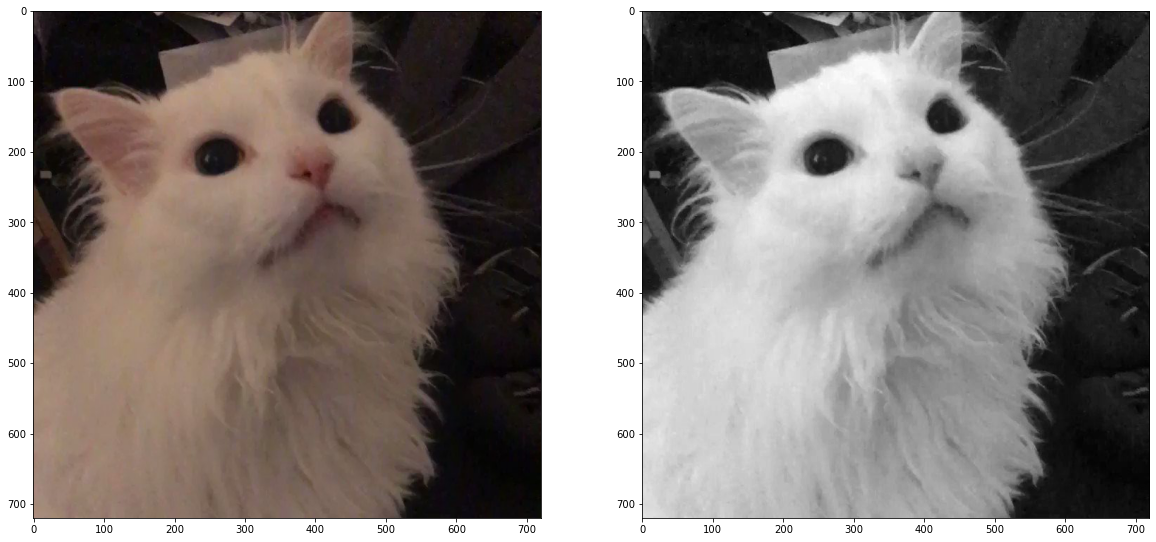

In [8]:
im_1 = plt.imread(jpgFiles[2])
im_2 = convertRgbToGrayLevel(im_1)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(im_1)
plt.subplot(1,2,2),plt.imshow(im_2,cmap='gray')
plt.show()

In [14]:
im_with_edges = get_edges(im_2)

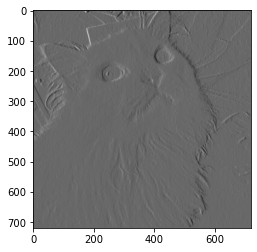

In [15]:
plt.imshow(im_with_edges,cmap='gray')
plt.show()

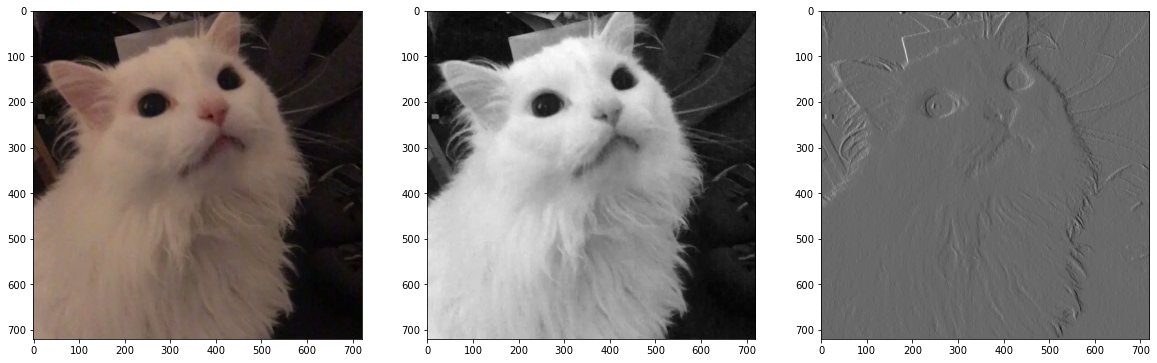

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_1)
plt.subplot(1,3,2),plt.imshow(im_2,cmap='gray')
plt.subplot(1,3,3),plt.imshow(im_with_edges,cmap='gray')
plt.show()